# 2D Ising quench dynamics

Computes
$$\langle Z \rangle = \langle 0 | U^{\dag} Z U | 0 \rangle$$
where $Z$ corresponds to Pauli Z operator on central site, $| 0 \rangle$ is the all-zero initial state, and $U = e^{-i H t}$ is the evolution under the 2D transverse-field Ising Hamiltonian
$$H = - \sum_{\langle i, j \rangle} Z_i Z_j - h_c \sum_i X_i $$
with open boundary conditions and critical point $h_c = 3.044382$.

In [1]:
import sys
sys.path.append('../')
from spd.SparsePauliDynamics import *
from spd.BaseOperatorRepresentation import * 

import numpy as np
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [2]:
#Generate neighbor list
def neighbor_list(n):
    nq = n**2
    return nq, [(i,j) for i,j in itertools.combinations(range(nq), 2) if abs(i-j)%n + abs(i//n-j//n)==1]

In [3]:
n=11
hc = 3.044382
h = hc
nq, nlist = neighbor_list(n)
hx = SparsePauliOp.from_sparse_list([('Z', [i], -h) for i in range(nq)], num_qubits=nq)
hzz = SparsePauliOp.from_sparse_list([('XX', pair, -1.0) for pair in nlist], num_qubits=nq)
h_tot = hzz + hx
obs = SparsePauliOp.from_sparse_list([('Z', [(nq-1)//2], 1.0)], num_qubits=nq)

In [4]:
obs_t = []
def exp_val_func(obs):
    obs_t.append(obs.copy())
    exp_val = np.sum(obs.coeffs[obs.ztype()])
    print(exp_val, obs.size)
    return exp_val

dt = 0.04
nsteps = int(0.6 / dt)
step = 1
threshold = 2.**-16
ops = dt*h_tot
sim = Simulation.from_pauli_list(obs, ops, threshold=threshold, nprocs=1)
r = sim.run_dynamics(nsteps, process=exp_val_func, process_every = step)
r = np.array(r)

(1+0j) 1
(0.9872680689481188+0j) 86
(0.9527802865260737+0j) 423
(0.9062561268754112+0j) 1196
(0.8595564709202614+0j) 2718
(0.8229751609186085+0j) 6881
(0.8022521816656444+0j) 15371
(0.7969637161598739+0j) 33120
(0.8017356305931461+0j) 65957
(0.809528973880784+0j) 127752
(0.8140914806996408+0j) 243869
(0.8145752322410063+0j) 448257
(0.8136584758600379+0j) 738403
(0.8138240117338559+0j) 1180306
(0.8185152330432861+0j) 1809742
(0.8281172561219123+0j) 2673542


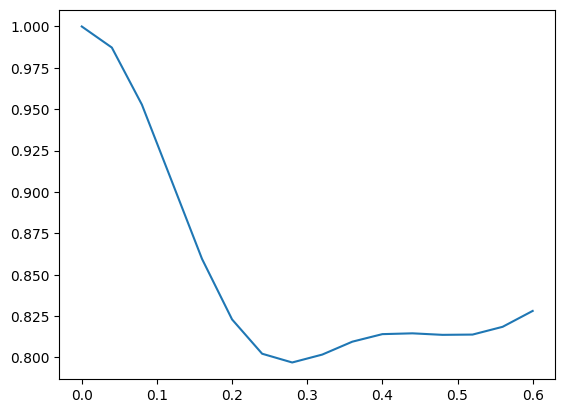

In [5]:
plt.plot(np.arange(len(r))*dt, r.real)
plt.show()